In [1]:
# %pip install -q pqdict opencv-python annoy scikit-image

In [2]:
# !git clone https://github.com/juleskuehn/typewriter-art

In [3]:
import sys,os
# sys.path.append(os.getcwd() + '/typewriter-art')
from kword import kword

1 positions optimized
784 comparisons made
1.07 seconds


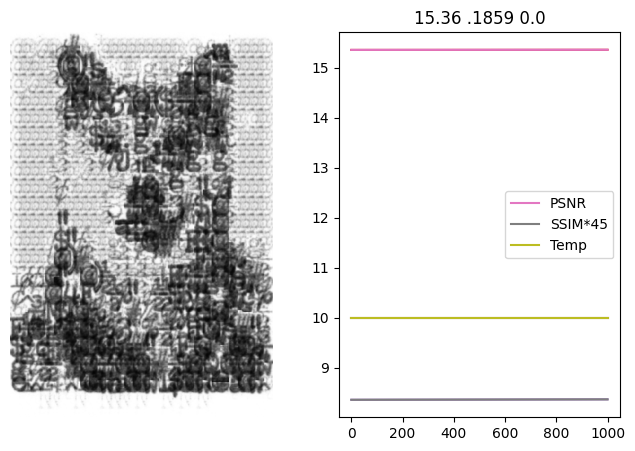

In [4]:
kword(
    # basePath = os.getcwd() + '/typewriter-art/',
    basePath = './',

    # Charset image
    sourceFn = 'lightRibbonPadded.png',
    slicesX = 79,
    slicesY = 11,
    whiteThreshold = 0.99, # Remove chars with >= this proportion white
    excludeChars = [19, 36, 53, 55, 61, 63, 65, 67, 69, 71, 77, 79, 81, 85, 88, 95, 101, 136, 150], # IDs of chars 
    
    # Target image
    targetFn = 'mwdog_crop.png', # Sample image of Menswear Dog
    rowLength = 15, # Width of the output typable in character columns.
    numLayers = 2, # For limiting maxChars
    maxChars = None, # 5790 chars is equivalent to 1000 english words (with spaces). (Can also be "None" - no quotes)

    # Find optimal crop?
    autoCrop = False,

    # Manually crop
    zoom = 0, # Between 0 and 3 (at 4, image is same as rowLength+1 at zoom 0) 
    shiftLeft = 0, # pixels
    shiftUp = 0, # pixels
    
    # Add an overtype pass. Expects to find '{basePath}results/resume.pkl'
    resume = False, # [True, False, 'filename']

    # Initial state
    initMode = 'euclidean', # ['euclidean', 'blend', 'angular', 'random', None]
    initOnly = False, # Stop after initializing (don't optimize)
    initPriority = True, # Initialize in priority order (priority only calculated once)
    initComposite = True, # Subtract already placed ink from target image 
    subtractiveScale = 32, # Between 0 (full subtraction from target) and 255 (same as initComposite=False)
    initBrighten = 0, # Raises black level, compressesing dynamic range. Between 0 (no brightening) and 1 (completely white)

    # Similarity metric
    mode = 'amse', # ['amse', 'ssim', 'blend']
    asymmetry = 0.2, # asymmetry > 0 penalizes "sins of commission" more harshly
    blendFunc = 'amse * ssim**0.5', # f(amse, ssim)

    # Search technique
    search = 'simAnneal', # ['greedy', 'simAnneal']
    maxVisits = 1000, # Stopping condition, necessary for stochastic search
    initTemp = 10, # For simAnneal. Initial temperature. Minimum is 0. Usually 10
    tempStep = 0.001, # For simAnneal. Amount to reduce temperature per visit usually 0.001
    scaleTemp = 0.001, # For simAnneal. Higher values increase likelihood of random choice
    tempReheatFactor = 0, # Proportion of previous initTemp to reheat to, ex. 0.5
    initK = 5, # For incrK: k = initK * numVisits
    
    # Selection order
    selectOrder = 'random', # ['linear', 'random', 'priority']

    # Saving
    genLayers = True, # Save the 4 typable layers
    saveChars = True, # Save the chopped character set
    hiResMockup = True, # Save the mockup at maximum size. False: matching target shape
    
    # Logging
    printEvery = 1000 # How many selections between progress updates?
)